In [1]:

%matplotlib widget
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random


In [3]:
#Endconfiguration with 5 robots 
placement_list = ['x0','r1','r2','r3','r4','r5']
E5 = nx.Graph()
nodes = ['n1','n2','n3','n4','n5','n6']
E5.add_nodes_from(nodes)

# neighborhoods (random)
# jede Knoten hat mind. zwei Nachbarn
edge_list = []
list_len = len(edge_list)
#rand_neighb = random.randint(rob_num+1, sum(rob_num+1))
#edge_list = [('n1','n2'), ('n1','n3'), ('n1','n4'), ('n2','n3'), ('n2','n4'), ('n3','n4'), ('n3','n5'), ('n3','n6'), ('n4','n5'), ('n4','n6'),('n5','n6')]
#E5.add_edges_from(edge_list)

In [4]:
def edges(g, edge_list, nodes):
    a = random.choice(nodes)
    b = random.choice(nodes)
    #TO DO: check: E5 zusammenhängend
    if (a != b) and ((a,b) not in edge_list) and ((b,a) not in edge_list):
        edge_list.append((a, b))
        print(edge_list)
        g.add_edges_from(edge_list)
        print ("n1 = ", g.degree['n1'], ", n2 = ", g.degree['n2'], ", n3 = ", g.degree['n3'], ", n4 = ", g.degree['n4'], ", n5 = ", g.degree['n5'], ", n6 = ", g.degree['n6'])
        for i in nodes:
            while (g.degree[i] < 2):
                edges(g, edge_list, nodes)
    return edge_list


In [5]:
edge_list = edges(E5,edge_list,nodes)
E5.add_edges_from(edge_list)

[('n2', 'n5')]
n1 =  0 , n2 =  1 , n3 =  0 , n4 =  0 , n5 =  1 , n6 =  0
[('n2', 'n5'), ('n4', 'n5')]
n1 =  0 , n2 =  1 , n3 =  0 , n4 =  1 , n5 =  2 , n6 =  0
[('n2', 'n5'), ('n4', 'n5'), ('n2', 'n4')]
n1 =  0 , n2 =  2 , n3 =  0 , n4 =  2 , n5 =  2 , n6 =  0
[('n2', 'n5'), ('n4', 'n5'), ('n2', 'n4'), ('n2', 'n3')]
n1 =  0 , n2 =  3 , n3 =  1 , n4 =  2 , n5 =  2 , n6 =  0
[('n2', 'n5'), ('n4', 'n5'), ('n2', 'n4'), ('n2', 'n3'), ('n2', 'n1')]
n1 =  1 , n2 =  4 , n3 =  1 , n4 =  2 , n5 =  2 , n6 =  0
[('n2', 'n5'), ('n4', 'n5'), ('n2', 'n4'), ('n2', 'n3'), ('n2', 'n1'), ('n5', 'n1')]
n1 =  2 , n2 =  4 , n3 =  1 , n4 =  2 , n5 =  3 , n6 =  0
[('n2', 'n5'), ('n4', 'n5'), ('n2', 'n4'), ('n2', 'n3'), ('n2', 'n1'), ('n5', 'n1'), ('n6', 'n2')]
n1 =  2 , n2 =  5 , n3 =  1 , n4 =  2 , n5 =  3 , n6 =  1
[('n2', 'n5'), ('n4', 'n5'), ('n2', 'n4'), ('n2', 'n3'), ('n2', 'n1'), ('n5', 'n1'), ('n6', 'n2'), ('n3', 'n1')]
n1 =  3 , n2 =  5 , n3 =  2 , n4 =  2 , n5 =  3 , n6 =  1
[('n2', 'n5'), ('n4', 'n

<function matplotlib.pyplot.show(close=None, block=None)>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
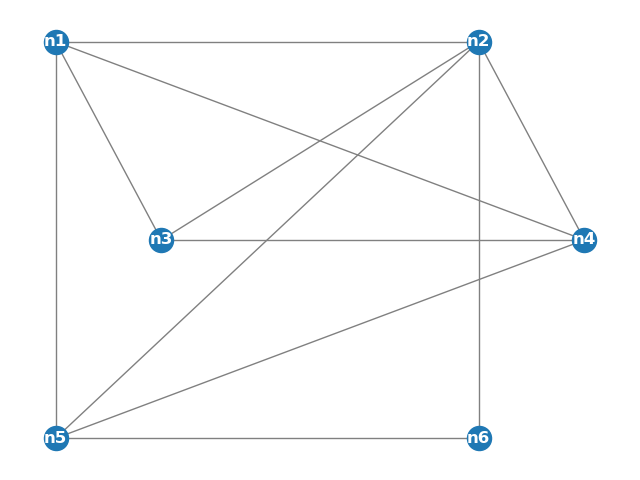

In [6]:
plt.figure()
pos = {'n1': (0,2), 'n2': (1,2), 'n3': (0.25,1), 'n4': (1.25,1), 'n5': (0,0), 'n6': (1,0)}
nx.draw(E5, pos=pos, with_labels = True, edge_color='gray', font_weight='bold', font_color='white')
plt.show

In [7]:
#Zuordnung: Index stimmt mit Knotennr überein
def place_robots(placement_list, graph):
    p = placement_list
    rob_list = []
    for i in range(0,6):
        a = random.choice(p)
        rob_list.append(a)
        p.remove(a)

    return rob_list

In [8]:
s=place_robots(placement_list,E5)
print(s)

['r2', 'r4', 'r3', 'x0', 'r5', 'r1']


In [9]:
def find_element(element,set_a):
    k = -1
    for i in set_a:
        k = k+1
        if i == element:
            n = nodes[k]
            return n

In [10]:
def find_element_tuple(element,set_a):
    element_pair = [item for item in set_a
          if item[0] == element or item[1] == element]
    
    return element_pair

In [11]:
n = find_element('x0', s)

In [12]:
def find_node_element(element,set_a):
    for i in set_a:
        if i[0] == element:
            node = i[1]
        if i[1] == element:
            node = i[0] 
    
    return node


In [13]:
def find_neighbors(set_a, edge_list):
    neighbor_list = []
    p_list = []
    n = find_element('x0',set_a)
    p_list = find_element_tuple(n,edge_list)
    while (len(p_list) != 0):
        nb = find_node_element(n,p_list) 
        neighbor_list.append(nb)
        p_list.pop()
    
    return neighbor_list

In [14]:
nb_list = find_neighbors(s,edge_list)

In [21]:
def randomize_one_step(s,edge_list,nb_list):
    #welche Roboter stehen auf den benachbarten Knoten zu x0?
    rob_list = []
    dummy_list = ['n1', 'n2', 'n3', 'n4','n5', 'n6']
    
    for i in nb_list:
        x = 0
        for j in dummy_list:
            if i==j:
                rob = s[x] 
                rob_list.append(rob)
            x = x+1
    c = random.choice(rob_list)
    
    #x0 und c tauschen Plätze (funktioniert)
    k = -1
    for i in set_a:
        k = k+1
        print(i)
        if i == 'x0':
            set_a[k] = c
        if i == c:
            set_a[k] = 'x0'
        print(set_a)
        
    return set_a


In [22]:
result = randomize_one_step(s,edge_list,nb_list)

['r2', 'r4', 'r3', 'x0', 'r5', 'r1']
nb =  ['n1', 'n3', 'n2', 'n5']
r2
['r2', 'r3', 'r1', 'x0', 'r5', 'r4']
r3
['r2', 'r3', 'r1', 'x0', 'r5', 'r4']
r1
['r2', 'r3', 'r1', 'x0', 'r5', 'r4']
x0
['r2', 'r3', 'r1', 'r4', 'r5', 'r4']
r5
['r2', 'r3', 'r1', 'r4', 'r5', 'r4']
r4
['r2', 'r3', 'r1', 'r4', 'r5', 'x0']


In [23]:
def randomize_multi_steps(set_a,edge_list):
    for x in range(1,5):
        #welche Roboter stehen auf den benachbarten Knoten zu x0?
        rob_list = []
        dummy_list = ['n1', 'n2', 'n3', 'n4','n5', 'n6']

        for i in nb_list:
            x = 0
            for j in dummy_list:
                if i==j:
                    rob = s[x] 
                    rob_list.append(rob)
                x = x+1
        c = random.choice(rob_list)

        #x0 und c tauschen Plätze (funktioniert)
        k = -1
        for i in set_a:
            k = k+1
            print(i)
            if i == 'x0':
                set_a[k] = c
            if i == c:
                set_a[k] = 'x0'
            print(set_a)

    return set_a


In [24]:
result = randomize_multi_steps(s,edge_list,nb_list)
#print(result)

['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
r1
['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
r4
['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
r2
['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
x0
['r1', 'r4', 'r2', 'r3', 'r5', 'r3']
r5
['r1', 'r4', 'r2', 'r3', 'r5', 'r3']
r3
['r1', 'r4', 'r2', 'r3', 'r5', 'x0']
r1
['r1', 'r4', 'r2', 'r3', 'r5', 'x0']
r4
['r1', 'r4', 'r2', 'r3', 'r5', 'x0']
r2
['r1', 'r4', 'r2', 'r3', 'r5', 'x0']
r3
['r1', 'r4', 'r2', 'x0', 'r5', 'x0']
r5
['r1', 'r4', 'r2', 'x0', 'r5', 'x0']
x0
['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
r1
['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
r4
['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
r2
['r1', 'r4', 'r2', 'x0', 'r5', 'r3']
x0
['r1', 'r4', 'r2', 'r5', 'r5', 'r3']
r5
['r1', 'r4', 'r2', 'r5', 'x0', 'r3']
r3
['r1', 'r4', 'r2', 'r5', 'x0', 'r3']
r1
['r1', 'r4', 'r2', 'r5', 'x0', 'r3']
r4
['r1', 'r4', 'r2', 'r5', 'x0', 'r3']
r2
['r1', 'r4', 'x0', 'r5', 'x0', 'r3']
r5
['r1', 'r4', 'x0', 'r5', 'x0', 'r3']
x0
['r1', 'r4', 'x0', 'r5', 'r2', 'r3']
r3
['r1', 'r4', 'x0', 'r5', 'r2', 'r3']


In [1]:
def randomize3(set_a,edge_list):
    # for x in range(1,5):
    ng_list = find_neighbors(set_a,edge_list) #Nachbarknoten vom Knoten auf dem x0 steht
    rob_list = []
    for i in ng_list:
        rob = find_node_element(i,set_a) 
        rob_list.append(rob)
    c = random.choice(rob_list)
    d = c
    #print(rob_list)
    print(c)
    set_b = []
    set_b = set_a
    
    #x0 und c tauschen Plätze
    for index, item in enumerate(set_a):
        itemlist = list(item)
        if itemlist[0] == 'x0':
            itemlist[0] = c
        if itemlist[1] == 'x0':
            itemlist[1] = c       
        item = tuple(itemlist)
        print(item)
        print("---")
    

        #set_a[index] = item
        #index_a = index
    
    for index, item in enumerate(set_b):
        itemlist = list(item)
        if itemlist[0] == d:
            print (itemlist)
            itemlist[0] = 'x0'
        if itemlist[1] == d:
            itemlist[1] = 'x0'      
        item = tuple(itemlist)
        print(item)
        set_a[index] = item
        print("+++")
        

    return set_a


In [18]:
print(s)

result = randomize3(s,edge_list)
print(result)

['r3', 'r1', 'x0', 'r5', 'r4', 'r2']


UnboundLocalError: local variable 'node' referenced before assignment

In [1]:
def randomize2(set_a,edge_list):
    # for x in range(1,5):
    ng_list = find_neighbors(set_a,edge_list) #Nachbarknoten vom Knoten auf dem x0 steht
    rob_list = []
    for i in ng_list:
        rob = find_node_element(i,set_a) 
        rob_list.append(rob)
    c = random.choice(rob_list)
    #print(rob_list)
    print(c)
    
    #x0 und c tauschen Plätze
    for index, item in enumerate(set_a):
        itemlist = list(item)
        if (itemlist[1] == c):
            itemlist[1] = 'x0' 
            item = tuple(itemlist)
            set_a[index] = item
            d = set_a[index]
            set_a.remove(index)
        if (itemlist[1] == 'x0'):
            itemlist[1] = c 
            item = tuple(itemlist)
            set_a[index] = item
            d = set_a[index]
            set_a.remove(index)
            
    set_a.append(d)
    print(item)
    print("---")

    return set_a

In [37]:
def randomize3(set_a,edge_list):
    # for x in range(1,5):
    ng_list = find_neighbors(set_a,edge_list) #Nachbarknoten vom Knoten auf dem x0 steht
    rob_list = []
    for i in ng_list:
        rob = find_node_element(i,set_a) 
        rob_list.append(rob)
    c = random.choice(rob_list)
    #print(rob_list)
    print(c)
    
    #x0 und c tauschen Plätze
    for index, item in enumerate(set_a):
        itemlist = list(item)
        if (itemlist[1] == c):
            itemlist[1] = 'x0' 
            item = tuple(itemlist)
            set_a[index] = item
            d = set_a[index]
            set_a.remove(index)
        if (itemlist[1] == 'x0'):
            itemlist[1] = c 
            item = tuple(itemlist)
            set_a[index] = item
            d = set_a[index]
            set_a.remove(index)
            
    set_a.append(d)
    print(item)
    print("---")

    return set_a

In [ ]:
def place_robots1(placement_list, graph):
    set_a = []
    n = nodes
    n2 = []
    p = placement_list
    while not n == n2:
        a = random.choice(n)
        b = random.choice(p)
        set_a.append((a,b))
        n.remove(a)
        p.remove(b)

    return set_a